In [1]:
!pip install opencv-python-headless numpy matplotlib

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/1c/9b/583c8d9259f6fc19413f83fd18dd8e6cbc8eefb0b4dc6da52dd151fe3272/opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 24.4 MB/s eta 0:00:0000:0100:01


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

In [2]:
#function to exrtract frames from a .MOV file
def get_frame_from_video(video_path, frame_number):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise ValueError(f"Could not read frame {frame_number}")
    return frame

In [422]:
#getting frame from video
video_path = "/Users/colegilbert/Downloads/Size3.562mm_condensation15_evaporation7_dome_Trial1.MOV"
frame_num = 300
frame = get_frame_from_video(video_path, frame_num)

#preprocessing frame
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blurred_frame = cv2.medianBlur(gray_frame, 5)

(Text(0.5, 1.0, 'Grayscale Frame'), ([], []), ([], []))

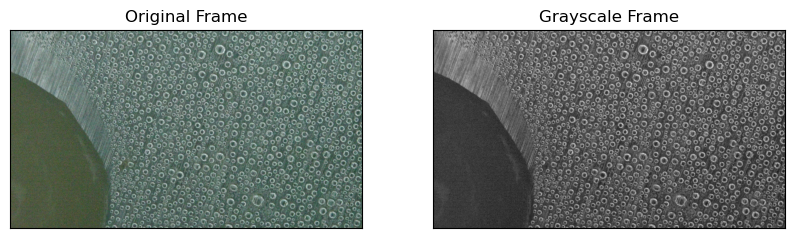

In [423]:
#displaying frames
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray_frame, cmap='gray')
plt.title('Grayscale Frame'), plt.xticks([]), plt.yticks([])

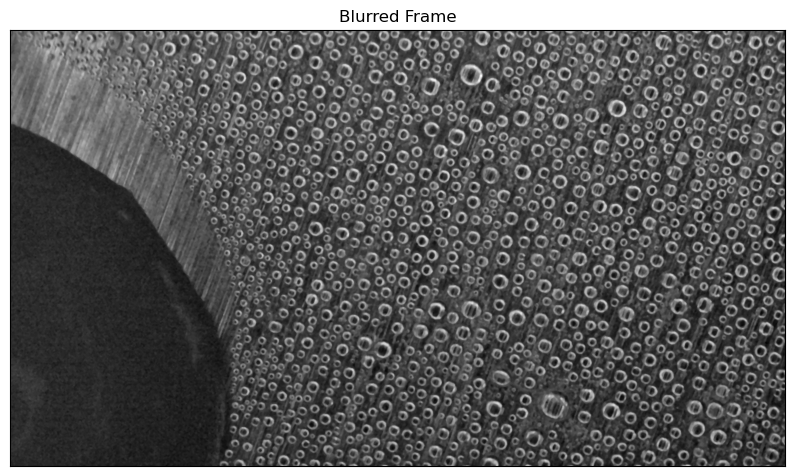

In [424]:
plt.figure(figsize=(10, 10))
plt.imshow(blurred_frame, cmap='gray')
plt.title('Blurred Frame'), plt.xticks([]), plt.yticks([])
plt.show()

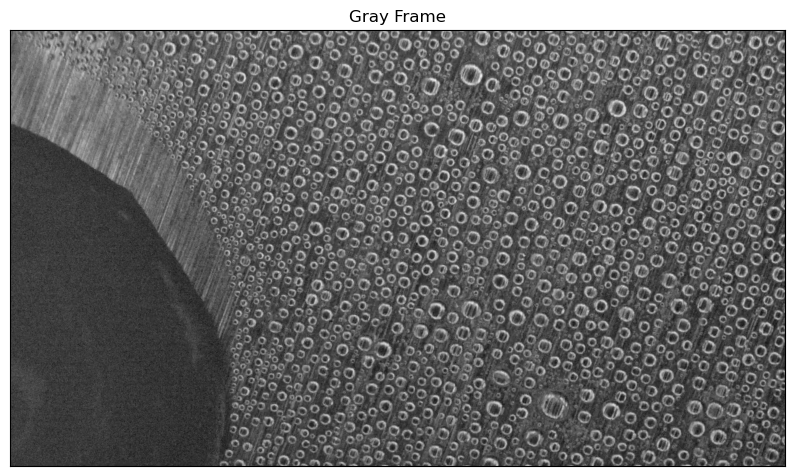

In [432]:
plt.figure(figsize=(10, 10))
plt.imshow(gray_frame, cmap='gray')
plt.title('Gray Frame'), plt.xticks([]), plt.yticks([])
plt.show()

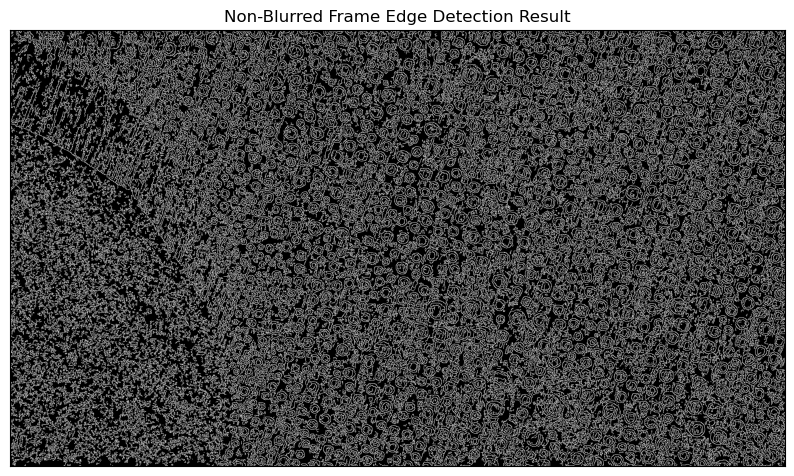

In [425]:
edges = cv2.Canny(gray_frame, 50, 100)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Non-Blurred Frame Edge Detection Result'), plt.xticks([]), plt.yticks([])
plt.show()

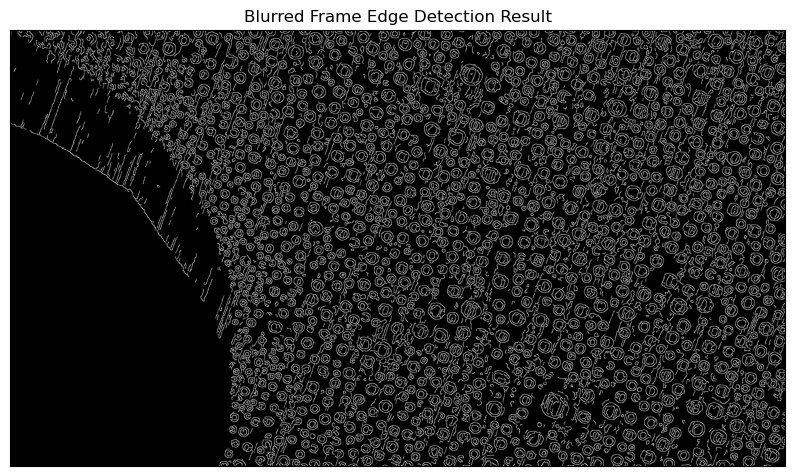

In [426]:
edges = cv2.Canny(blurred_frame, 50, 100)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Blurred Frame Edge Detection Result'), plt.xticks([]), plt.yticks([])
plt.show()

In [434]:
#identifying circles
circles = cv2.HoughCircles(
    blurred_frame, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=12, 
    param1=120, 
    param2=22, 
    minRadius=3, 
    maxRadius=25
)

In [435]:
#prepare results
output_frame = frame.copy()
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    centers = circles[:, :2]
    radii = circles[:, 2]
    for (x, y, r) in circles:
        cv2.circle(output_frame, (x, y), r, (0, 255, 0), 2)

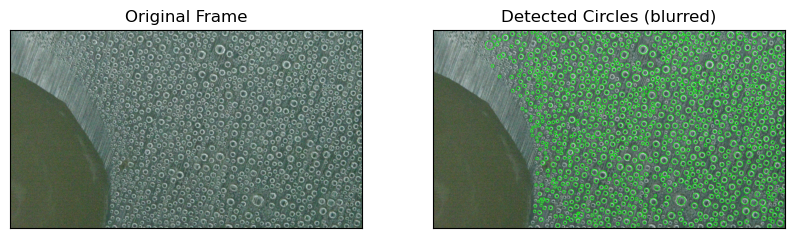

In [436]:
#display results
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles (blurred)'), plt.xticks([]), plt.yticks([])
plt.show()

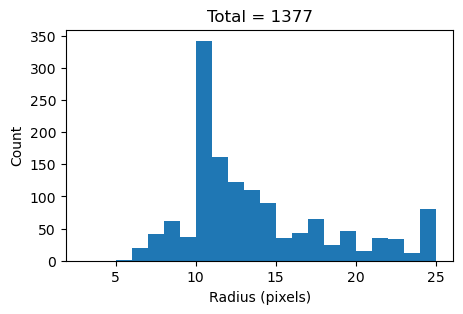

In [430]:
#display histogram
if circles is not None:
    plt.figure(figsize=(5, 3))
    plt.hist(radii, bins=range(3, 26))
    plt.title(f'Total = {len(radii)}')
    plt.xlabel('Radius (pixels)')
    plt.ylabel('Count')
    plt.show()
else:
    print("No circles were detected.")

In [3]:
def preprocess(frame):
    """
    Image preprocessing: (i) convert to gray, (ii) blur with median filter.
    """
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.medianBlur(gray_frame, 5)
    return blurred_frame

In [4]:
def identify_circles(frame_proc):
    """
    Use houghCircle to identify circles.
    """

    circles = cv2.HoughCircles(
    frame_proc, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=12, 
    param1=120, 
    param2=22, 
    minRadius=3, 
    maxRadius=25
    )
    
    return circles

In [5]:
video_path = r"E:\F\Condensation Data.old\Fall 2023\08282023\Size3.562mm_condensation15_evaporation7_dome_Trial1.MOV"
frame = get_frame_from_video(video_path, 300)
frame_proc = preprocess(frame)
circles = identify_circles(frame_proc)

In [8]:
circles.squeeze().shape

(969, 3)

In [9]:
circles

array([[[1685.5,  495.5,   16.1],
        [ 708.5,   54.5,   18.6],
        [1148.5,  514.5,   15.8],
        ...,
        [ 752.5,  385.5,    4.6],
        [1766.5,  375.5,    4.6],
        [1522.5,  617.5,    3.8]]], dtype=float32)

In [28]:
#prepare results
df = pd.DataFrame(data=circles.squeeze(), columns=["X", "Y", "R"])

In [15]:
df.to_csv("test_data.csv", index=False)

In [21]:
frame.shape

(1080, 1920, 3)

In [26]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [27]:
io.imsave("img.tif", gray_frame)

In [22]:
a = [1,2,3]

In [24]:
a[-2:]

[2, 3]